# **Levene's Test for Equal Variance (Homogeneity of Variance)**

Levene's test is used to check the assumption of equal variances (also known as homogeneity of variances) across different groups or samples. This assumption is important for many statistical tests, such as ANOVA and t-tests, which require that the variability within each group being compared is similar. When variances are unequal (heteroscedasticity), it can lead to incorrect conclusions in statistical tests.

- The primary purpose of Levene’s test is to ensure that the assumption of equal variances holds before applying statistical tests that rely on this assumption (like One-Way ANOVA and t-test) and comparing more than two groups if the groups have similar variance

- Levene’s test is particularly useful when comparing more than two groups, and you want to verify if the groups have similar variances.

## State the Hypotheses

- **Null Hypothesis (H₀):** The variances of the groups are equal (homogeneity of variances).

- **Alternative Hypothesis (H₁):** The variances of the groups are not equal (heterogeneity of variances).

## Dataset

Using Housing Price Data for this test. This dataset has 3 Group of City. City 1, City 2, City 3 with Price Columns.

### Generating Dataset Code

In [ ]:
# import numpy as np
# import pandas as pd

# # Set random seed for reproducibility
# np.random.seed(42)

# # Generate synthetic house price data for three different cities
# city_1_prices = np.random.normal(loc=300000, scale=50000, size=150)  # City 1
# city_2_prices = np.random.normal(loc=350000, scale=60000, size=150)  # City 2
# city_3_prices = np.random.normal(loc=400000, scale=70000, size=150)  # City 3

# # Combine data into a DataFrame
# house_price_data = pd.DataFrame({
#     'City': ['City 1'] * 150 + ['City 2'] * 150 + ['City 3'] * 150,
#     'Price': np.concatenate([city_1_prices, city_2_prices, city_3_prices])
# })

# house_price_data.to_csv('C:/Github Repository/Advanced-Statistical-Methods-for-AB-and-Hypothesis-Testing-Methods-of-Experimentations/datasets/Levenes Test/house_price_data.csv', index=False)

# # Display the first few rows of the dataset
# house_price_data.head()

### Loading the dataset

In [25]:
import pandas as pd

data = pd.read_csv('C:/Github Repository/Advanced-Statistical-Methods-for-AB-and-Hypothesis-Testing-Methods-of-Experimentations/datasets/Levenes Test/house_price_data.csv')
data.head()

,City,Price
0,City 1,324835.707651
1,City 1,293086.784941
2,City 1,332384.426905
3,City 1,376151.492820
4,City 1,288292.331264


## Visualize the data using a boxplot

<Figure size 800x600 with 0 Axes>

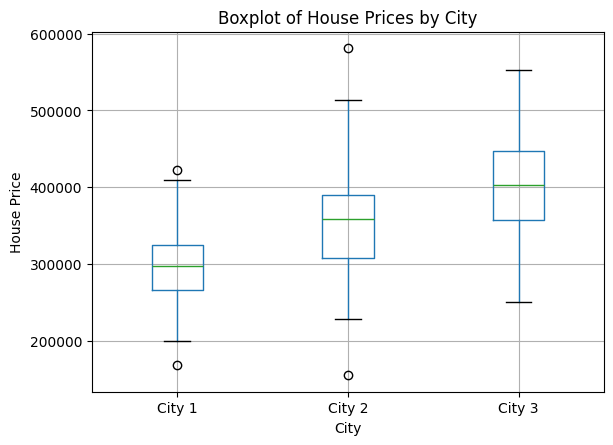

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
data.boxplot(by='City', column='Price')
plt.title("Boxplot of House Prices by City")
plt.suptitle('')
plt.ylabel("House Price")
plt.show()

## Shapiro-Wilk Test

In [29]:
from scipy import stats

shapiro_results = {}
for city in data['City'].unique():
    city_prices = data[data['City'] == city]['Price']
    shapiro_results[city] = stats.shapiro(city_prices)
    print(f"{city} - W: {shapiro_results[city][0]:.4f}, p-value: {shapiro_results[city][1]:.4f}")
    if shapiro_results[city][1] < 0.05:
        print("The data is not normally distributed.\n")
    else:
        print("The data is normally distributed.\n")

City 1 - W: 0.9958, p-value: 0.9480
The data is normally distributed.

City 2 - W: 0.9854, p-value: 0.1150
The data is normally distributed.

City 3 - W: 0.9930, p-value: 0.6759
The data is normally distributed.



**Shapiro-Wilk Test (Normality Check):**

- **City 1:** The p-value is 0.9480, which is greater than 0.05, indicating that the data is normally distributed.

- **City 2:** The p-value is 0.1150, which is greater than 0.05, indicating that the data is normally distributed.

- **City 3:** The p-value is 0.6759, which is greater than 0.05, indicating that the data is normally distributed.

## Levene's Test for Equality of Variance

In [30]:
city_1_prices = data[data['City'] == 'City 1']['Price']
city_2_prices = data[data['City'] == 'City 2']['Price']
city_3_prices = data[data['City'] == 'City 3']['Price']

In [31]:
levene_stat, levene_p_value = stats.levene(city_1_prices, city_2_prices, city_3_prices)
print(f"Levene's Test statistic: {levene_stat:.4f}, p-value: {levene_p_value:.4f}")

Levene's Test statistic: 7.6098, p-value: 0.0006


**The p-value is 0.0006, which is less than 0.05. This indicates that the variances of house prices across the three cities are significantly different.**